# Análise do dataset resultante da transformação e unificação dos dados ("Etapa 4").

## 1. Instalando e importando as bibliotecas utlizadas nesse notebook.

In [156]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Carga do dataset a ser utilizado para ser analisado.

#### Nessa etapa serão carregados os datasets:
- "final_transformacao_dados_unificados_aids_indicadores.csv": resultado do notebook "4_transformacao_unificacao_datasets".
- "massa_bruta_pais_por_indicadores_aids.csv": resultado do notebook "2_extracao_transformacao_massa_indicadores_todos_paises_aids".

In [2]:
df_analise = pd.read_csv('../data/final_transformacao_dados_unificados_aids_indicadores.csv')

df_analise.head()

,AIDS,PIB,Usuários Internet,Crescimento Populacional,Desemprego,Investimentos Educação,Analfabetismo 15 e 24,Analfabetismo 25 e 64,Qtd Professores EF,Crianças Fora Escola,Qtd Alunos por professor,Qtd Alunos EF
0,1.0,15.94,4.00,2.81,8.1,3.46,2947366.0,6844551.6,118858.0,8.97,44.42,91.03
1,1.0,17.93,5.00,3.10,8.2,3.44,2947366.0,6844551.6,121593.0,8.97,43.52,91.03
2,1.0,20.54,5.45,3.27,8.0,2.53,2947366.0,6844551.6,129093.0,8.97,44.68,91.03
3,1.0,20.05,5.90,3.32,8.4,3.48,2947366.0,6844551.6,130957.0,8.97,45.71,91.03
4,1.0,20.05,7.00,3.18,8.6,3.78,2947366.0,6844551.6,130957.0,8.97,45.71,91.03


In [3]:
df_analise_indicadores = pd.read_csv('../data/massa_bruta_pais_por_indicadores_aids.csv')

df_analise_indicadores.head()

,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,SE.PRM.TENR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Afghanistan,NY.GDP.MKTP.CD,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
2,Afghanistan,SE.XPD.TOTL.GD.ZS,3.460000e+00,3.440000e+00,2.530000e+00,3.480000e+00,3.780000e+00,3.320000e+00,0.000000e+00
3,Afghanistan,UIS.ILLPOP.AG25T64,0.000000e+00,6.844552e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,Afghanistan,IT.NET.USER.P2,4.000000e+00,5.000000e+00,5.450000e+00,5.900000e+00,7.000000e+00,8.260000e+00,1.060000e+01


## 3. Análise de cada coluna presente no dataset.

### "AIDS"

In [5]:
df_analise['AIDS'].value_counts()

0.0    499
1.0    119
Name: AIDS, dtype: int64

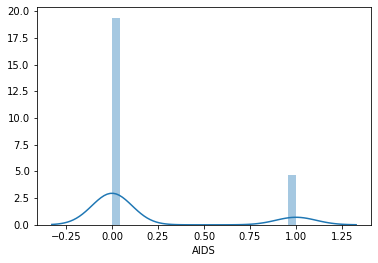

In [11]:
sns.distplot(df_analise['AIDS'])

plt.savefig('../plots/aids.png')

### PIB do país

In [172]:
df_analise_pib = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['NY.GDP.MKTP.CD'])]

df_analise_pib = df_analise_pib.drop(columns=['Indicator Code'])

df_analise_pib.index = range(df_analise_pib.shape[0])

df_analise_pib = df_analise_pib.replace(0, np.nan)

df_analise_pib['Media Bi'] = df_analise_pib.loc[: , "2010":"2016"].mean(axis=1).round(2)

df_analise_pib['Media Bi'] = df_analise_pib['Media Bi'].divide(7000000000).round(2)

srs_paises = df_analise_pib['Media Bi']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores_pib = df_analise_pib.sort_values('Media Bi', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_pib)
print("Países donos dos 10 maiores PIB:", nomes_paises)

df_analise_pib = df_analise_pib['Media Bi'].fillna(0)

df_analise_pib.describe().round(2)

Total de registros com valores vazios 13
Países com dados vazios (%) 5.99
Países com valores acima da média (%) 14.71
Países donos dos 10 maiores PIB: United States, China, Japan, Germany, United Kingdom, France, Brazil, Italy, India, Russian Federation


count     217.00
mean       48.56
std       201.80
min         0.00
25%         0.57
50%         2.77
75%        23.74
max      2397.29
Name: Media Bi, dtype: float64

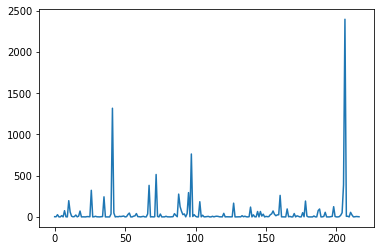

In [173]:
fig, ax = plt.subplots()
ax.plot(df_analise_pib)

plt.savefig('../plots/pib.png')

### Usuários de Internet

In [4]:
df_analise_internet = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['IT.NET.USER.P2'])]

df_analise_internet = df_analise_internet.drop(columns=['Indicator Code'])

df_analise_internet.index = range(df_analise_internet.shape[0])

df_analise_internet = df_analise_internet.replace(0, np.nan)

df_analise_internet['Media'] = df_analise_internet.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_internet['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores = df_analise_internet.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores)
print("Países 10 maiores valores:", nomes_paises)

df_analise_internet = df_analise_internet['Media'].fillna(0)

df_analise_internet.describe().round(2)

Total de registros com valores vazios 14
Países com dados vazios (%) 6.45
Países com valores acima da média (%) 50.25
Países 10 maiores valores: Iceland, Norway, Luxembourg, Denmark, Bermuda, Sweden, Netherlands, Liechtenstein, Andorra, United Kingdom


count    217.00
mean      40.22
std       29.13
min        0.00
25%       13.37
50%       39.40
75%       64.77
max       96.51
Name: Media, dtype: float64

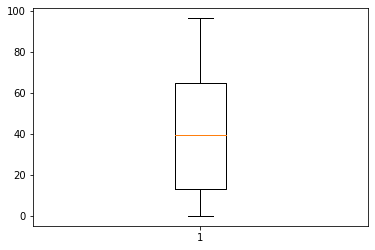

In [5]:
fig, ax = plt.subplots()
ax.boxplot(df_analise_internet)

plt.savefig('../plots/usuários_internet.png')

### Crescimento Populacional Anual

In [6]:
df_analise_pop = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['SP.POP.GROW'])]

df_analise_pop = df_analise_pop.drop(columns=['Indicator Code'])

df_analise_pop.index = range(df_analise_pop.shape[0])

df_analise_pop = df_analise_pop.replace(0, np.nan)

df_analise_pop['Media'] = df_analise_pop.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_pop['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores = df_analise_pop.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores)
print("Países 10 maiores valores:", nomes_paises)

df_pop_negativo = df_analise_pop[(df_analise_pop['Media'] < 0)]

print("Quantidade países com taxa negativa de crescimento populacional", df_pop_negativo['Country Name'].size)
nomes_paises = ', '.join(df_pop_negativo['Country Name'].to_list())
print("Nome dos países com taxa negativa de crescimento populacional", nomes_paises)

df_analise_pop = df_analise_pop['Media'].fillna(0)

df_analise_pop.describe().round(2)

Total de registros com valores vazios 2
Países com dados vazios (%) 0.92
Países com valores acima da média (%) 44.65
Países 10 maiores valores: Qatar, Oman, Kuwait, Lebanon, Jordan, South Sudan, Equatorial Guinea, Niger, Angola, Uganda
Quantidade países com taxa negativa de crescimento populacional 25
Nome dos países com taxa negativa de crescimento populacional Albania, American Samoa, Andorra, Bermuda, Bosnia and Herzegovina, Bulgaria, Croatia, Estonia, Georgia, Greece, Greenland, Hungary, Japan, Latvia, Lithuania, Moldova, Northern Mariana Islands, Poland, Portugal, Puerto Rico, Romania, Serbia, Syrian Arab Republic, Ukraine, Virgin Islands (U.S.)


count    217.00
mean       1.35
std        1.32
min       -1.75
25%        0.44
50%        1.17
75%        2.18
max        6.85
Name: Media, dtype: float64

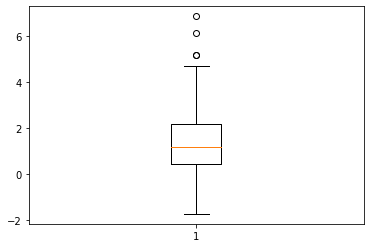

In [7]:
fig, ax = plt.subplots()
ax.boxplot(df_analise_pop)

plt.savefig('../plots/crescimento_populacional.png')

### Taxa de Desemprego

In [8]:
df_analise_desemprego = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['SL.UEM.TOTL.ZS'])]

df_analise_desemprego = df_analise_desemprego.drop(columns=['Indicator Code'])

df_analise_desemprego.index = range(df_analise_desemprego.shape[0])

df_analise_desemprego = df_analise_desemprego.replace(0, np.nan)

df_analise_desemprego['Media'] = df_analise_desemprego.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_desemprego['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores_desemprego = df_analise_desemprego.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_desemprego)
print("Países 10 maiores valores:", nomes_paises)

df_analise_desemprego = df_analise_desemprego['Media'].fillna(0)

df_analise_desemprego.describe().round(2)

Total de registros com valores vazios 31
Países com dados vazios (%) 14.29
Países com valores acima da média (%) 36.02
Países 10 maiores valores: Solomon Islands, Gambia, The, Macedonia, FYR, Bosnia and Herzegovina, Swaziland, Lesotho, South Africa, West Bank and Gaza, Mozambique, Spain


count    217.00
mean       7.72
std        6.68
min        0.00
25%        3.10
50%        6.19
75%       10.70
max       31.06
Name: Media, dtype: float64

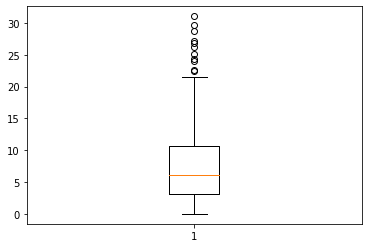

In [186]:
fig, ax = plt.subplots()
ax.boxplot(df_analise_desemprego)

plt.savefig('../plots/desemprego.png')

### Investimentos do governo na educação

In [9]:
df_analise_educacao = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['SE.XPD.TOTL.GD.ZS'])]

df_analise_educacao = df_analise_educacao.drop(columns=['Indicator Code'])

df_analise_educacao.index = range(df_analise_educacao.shape[0])

df_analise_educacao = df_analise_educacao.replace(0, np.nan)

df_analise_educacao['Media'] = df_analise_educacao.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_educacao['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores_educacao = df_analise_educacao.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_educacao)
print("Países 10 maiores valores:", nomes_paises)

df_analise_educacao = df_analise_educacao['Media'].fillna(0)

df_analise_educacao.describe().round(2)

Total de registros com valores vazios 60
Países com dados vazios (%) 27.65
Países com valores acima da média (%) 46.5
Países 10 maiores valores: Cuba, Micronesia, Fed. Sts., Solomon Islands, Moldova, Namibia, Denmark, Timor-Leste, Iceland, Sweden, Malta


count    217.00
mean       3.36
std        2.62
min        0.00
25%        0.00
50%        3.54
75%        5.19
max       12.84
Name: Media, dtype: float64

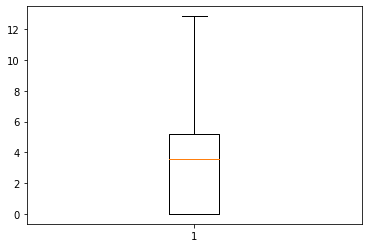

In [195]:
fig, ax = plt.subplots()
ax.boxplot(df_analise_educacao)

plt.savefig('../plots/investimentos_educação.png')

### Taxa de analfabetismo entre 15 e 24 anos

In [10]:
df_analise_analfabetismo_15a24 = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['UIS.LP.AG15T24'])]

df_analise_analfabetismo_15a24 = df_analise_analfabetismo_15a24.drop(columns=['Indicator Code'])

df_analise_analfabetismo_15a24.index = range(df_analise_analfabetismo_15a24.shape[0])

df_analise_analfabetismo_15a24 = df_analise_analfabetismo_15a24.replace(0, np.nan)

df_analise_analfabetismo_15a24['Media'] = df_analise_analfabetismo_15a24.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_analfabetismo_15a24['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores_analfab_15a24 = df_analise_analfabetismo_15a24.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_analfab_15a24)
print("Países 10 maiores valores:", nomes_paises)

df_analise_analfabetismo_15a24 = df_analise_analfabetismo_15a24['Media'].fillna(0)

df_analise_analfabetismo_15a24.describe().round(2)

Total de registros com valores vazios 98
Países com dados vazios (%) 45.16
Países com valores acima da média (%) 21.85
Países 10 maiores valores: India, Pakistan, Bangladesh, Iraq, Afghanistan, Niger, Congo, Dem. Rep., Cote d'Ivoire, Chad, Burkina Faso


count         217.00
mean       426692.85
std       2397791.58
min             0.00
25%             0.00
50%           460.00
75%         59744.00
max      32619767.00
Name: Media, dtype: float64

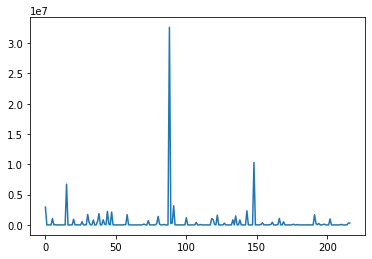

In [11]:
fig, ax = plt.subplots()
ax.plot(df_analise_analfabetismo_15a24)

plt.savefig('../plots/analfabetismo_15a24.png')

### Taxa de analfabetismo entre 25 e 64 anos

In [12]:
df_analise_analfabetismo_25a64 = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['UIS.ILLPOP.AG25T64'])]

df_analise_analfabetismo_25a64 = df_analise_analfabetismo_25a64.drop(columns=['Indicator Code'])

df_analise_analfabetismo_25a64.index = range(df_analise_analfabetismo_25a64.shape[0])

df_analise_analfabetismo_25a64 = df_analise_analfabetismo_25a64.replace(0, np.nan)

df_analise_analfabetismo_25a64['Media'] = df_analise_analfabetismo_25a64.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_analfabetismo_25a64['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores_analfab_25a64 = df_analise_analfabetismo_25a64.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_analfab_25a64)
print("Países 10 maiores valores:", nomes_paises)

df_analise_analfabetismo_25a64 = df_analise_analfabetismo_25a64['Media'].fillna(0)

df_analise_analfabetismo_25a64.describe().round(2)

Total de registros com valores vazios 99
Países com dados vazios (%) 45.62
Países com valores acima da média (%) 15.25
Países 10 maiores valores: India, Pakistan, Bangladesh, China, Egypt, Arab Rep., Brazil, Afghanistan, Myanmar, Iraq, Congo, Dem. Rep.


count    2.170000e+02
mean     2.004525e+06
std      1.370783e+07
min      0.000000e+00
25%      0.000000e+00
50%      2.305880e+03
75%      3.839315e+05
max      1.949955e+08
Name: Media, dtype: float64

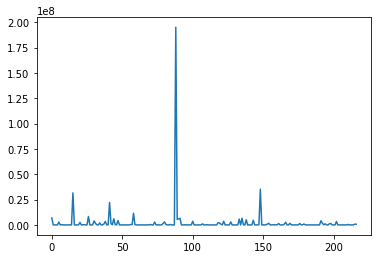

In [13]:
fig, ax = plt.subplots()
ax.plot(df_analise_analfabetismo_25a64)

plt.savefig('../plots/analfabetismo_25a64.png')

### Quantidade de Professores no Ensino Fundamental

In [18]:
df_analise_professores = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['SE.PRM.TCHR'])]

df_analise_professores = df_analise_professores.drop(columns=['Indicator Code'])

df_analise_professores.index = range(df_analise_professores.shape[0])

df_analise_professores = df_analise_professores.replace(0, np.nan)

df_analise_professores['Media'] = df_analise_professores.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_professores['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores_professores = df_analise_professores.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_professores)
print("Países 10 maiores valores:", nomes_paises)

df_analise_professores = df_analise_professores['Media'].fillna(0)

df_analise_professores.describe().round(2)

Total de registros com valores vazios 31
Países com dados vazios (%) 14.29
Países com valores acima da média (%) 20.43
Países 10 maiores valores: China, India, United States, Indonesia, Brazil, Nigeria, Mexico, Philippines, Bangladesh, Egypt, Arab Rep.


count        217.00
mean      130331.61
std       524375.79
min            0.00
25%         1090.83
50%        20614.33
75%        71004.00
max      5909928.83
Name: Media, dtype: float64

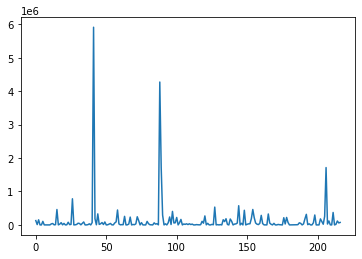

In [19]:
fig, ax = plt.subplots()
ax.plot(df_analise_professores)

plt.savefig('../plots/qtd_professores_ef.png')

### Crianças com idade para estar no ensino fundamental mas estão fora escola

In [22]:
df_analise_fora_escola = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['UIS.ROFST.1'])]

df_analise_fora_escola = df_analise_fora_escola.drop(columns=['Indicator Code'])

df_analise_fora_escola.index = range(df_analise_fora_escola.shape[0])

df_analise_fora_escola = df_analise_fora_escola.replace(0, np.nan)

df_analise_fora_escola['Media'] = df_analise_fora_escola.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_fora_escola['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_pib_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_pib_acima_media*100)/srs_paises.count()), 2))

paises_maiores_fora_escola = df_analise_fora_escola.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_fora_escola)
print("Países 10 maiores valores:", nomes_paises)

df_analise_fora_escola = df_analise_fora_escola['Media'].fillna(0)

df_analise_fora_escola.describe().round(2)

Total de registros com valores vazios 42
Países com dados vazios (%) 19.35
Países com valores acima da média (%) 30.29
Países 10 maiores valores: South Sudan, Liberia, Eritrea, Equatorial Guinea, Sudan, Djibouti, Niger, Mali, Nigeria, Burkina Faso


count    217.00
mean       7.44
std       11.20
min        0.00
25%        0.64
50%        3.16
75%        8.91
max       64.18
Name: Media, dtype: float64

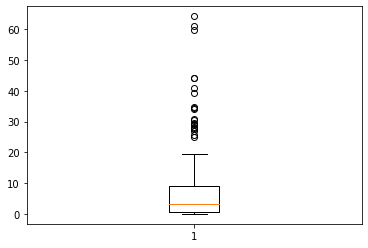

In [34]:
fig, ax = plt.subplots()
ax.boxplot(df_analise_fora_escola)

plt.savefig('../plots/crianças_fora_escola_ef.png')

### Proporção de alunos por professores

In [28]:
df_analise_alunos = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['SE.PRM.ENRL.TC.ZS'])]

df_analise_alunos = df_analise_alunos.drop(columns=['Indicator Code'])

df_analise_alunos.index = range(df_analise_alunos.shape[0])

df_analise_alunos = df_analise_alunos.replace(0, np.nan)

df_analise_alunos['Media'] = df_analise_alunos.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_alunos['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_acima_media*100)/srs_paises.count()), 2))

paises_maiores_alunos = df_analise_alunos.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_alunos)
print("Países 10 maiores valores:", nomes_paises)

df_analise_alunos = df_analise_alunos['Media'].fillna(0)

df_analise_alunos.describe().round(2)

Total de registros com valores vazios 31
Países com dados vazios (%) 14.29
Países com valores acima da média (%) 39.25
Países 10 maiores valores: Central African Republic, Malawi, Chad, Rwanda, Mozambique, Ethiopia, Guinea-Bissau, Zambia, South Sudan, Uganda


count    217.00
mean      20.49
std       15.10
min        0.00
25%       11.28
50%       17.03
75%       28.11
max       81.92
Name: Media, dtype: float64

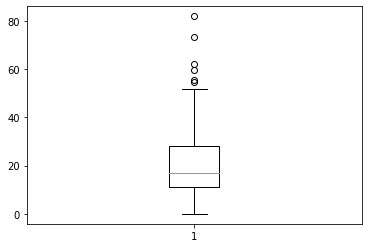

In [29]:
fig, ax = plt.subplots()
ax.boxplot(df_analise_alunos)

plt.savefig('../plots/alunos_por_professor_ef.png')

### Quantidade de alunos que se matricularam no ensino fundamental

In [32]:
df_analise_matriculados = df_analise_indicadores.loc[df_analise_indicadores['Indicator Code'].isin(['SE.PRM.TENR'])]

df_analise_matriculados = df_analise_matriculados.drop(columns=['Indicator Code'])

df_analise_matriculados.index = range(df_analise_matriculados.shape[0])

df_analise_matriculados = df_analise_matriculados.replace(0, np.nan)

df_analise_matriculados['Media'] = df_analise_matriculados.loc[: , "2010":"2016"].mean(axis=1).round(2)

srs_paises = df_analise_matriculados['Media']

qtd_total_paises = srs_paises.size
qtd_preenchidos = srs_paises.count()
qtd_vazios = (qtd_total_paises - qtd_preenchidos)
print("Total de registros com valores vazios", qtd_vazios)
print("Países com dados vazios (%)", ((qtd_vazios*100)/qtd_total_paises).round(2))

qtd_paises_acima_media = (srs_paises > srs_paises.mean()).sum()
print("Países com valores acima da média (%)", round(((qtd_paises_acima_media*100)/srs_paises.count()), 2))

paises_maiores_alunos = df_analise_matriculados.sort_values('Media', ascending=False).head(10)['Country Name'].to_list()
nomes_paises = ', '.join(paises_maiores_alunos)
print("Países 10 maiores valores:", nomes_paises)

df_analise_matriculados = df_analise_matriculados['Media'].fillna(0)

df_analise_matriculados.describe().round(2)

Total de registros com valores vazios 42
Países com dados vazios (%) 19.35
Países com valores acima da média (%) 69.71
Países 10 maiores valores: Japan, United Kingdom, Germany, Tunisia, Sweden, Norway, Netherlands, Kazakhstan, Spain, Canada


count    217.00
mean      73.20
std       37.47
min        0.00
25%       70.45
50%       93.24
75%       97.42
max       99.95
Name: Media, dtype: float64

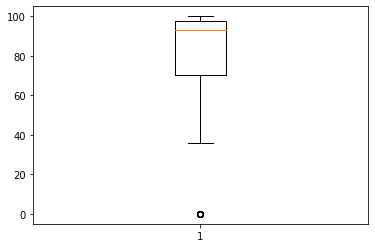

In [33]:
fig, ax = plt.subplots()
ax.boxplot(df_analise_matriculados)

plt.savefig('../plots/alunos_matriculados_ef.png')